In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [37]:
df = pd.read_csv('Task 3 and 4_Loan_Data.csv')

In [38]:
df.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               10000 non-null  int64  
 1   credit_lines_outstanding  10000 non-null  int64  
 2   loan_amt_outstanding      10000 non-null  float64
 3   total_debt_outstanding    10000 non-null  float64
 4   income                    10000 non-null  float64
 5   years_employed            10000 non-null  int64  
 6   fico_score                10000 non-null  int64  
 7   default                   10000 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 625.1 KB


In [5]:
df.isnull().sum()

customer_id                 0
credit_lines_outstanding    0
loan_amt_outstanding        0
total_debt_outstanding      0
income                      0
years_employed              0
fico_score                  0
default                     0
dtype: int64

In [6]:
df.duplicated().any()

np.False_

In [7]:
df.describe()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.974577e+06,1.461200,4159.677034,8718.916797,70039.901401,4.552800,637.557700,0.185100
std,2.293890e+06,1.743846,1421.399078,6627.164762,20072.214143,1.566862,60.657906,0.388398
min,1.000324e+06,0.000000,46.783973,31.652732,1000.000000,0.000000,408.000000,0.000000
25%,2.977661e+06,0.000000,3154.235371,4199.836020,56539.867903,3.000000,597.000000,0.000000
50%,4.989502e+06,1.000000,4052.377228,6732.407217,70085.826330,5.000000,638.000000,0.000000
75%,6.967210e+06,2.000000,5052.898103,11272.263740,83429.166133,6.000000,679.000000,0.000000
max,8.999789e+06,5.000000,10750.677810,43688.784100,148412.180500,10.000000,850.000000,1.000000


In [8]:
df_fisco = df[['fico_score', 'default']]

In [9]:
df_fisco

,fico_score,default
0,605,0
1,572,1
2,602,0
3,612,0
4,631,0
...,...,...
9995,697,0
9996,615,0
9997,596,0
9998,647,0


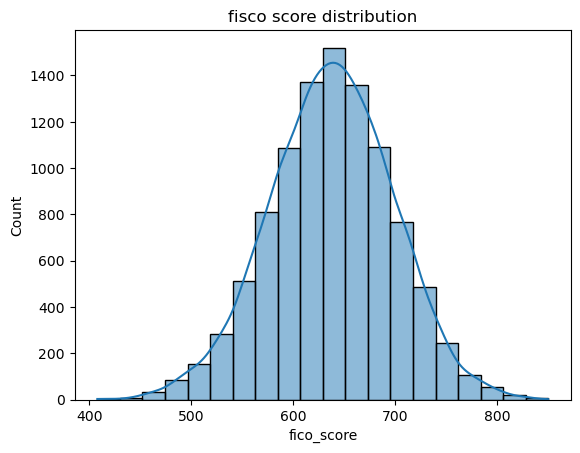

In [10]:
sns.histplot(df_fisco["fico_score"], bins=20, kde=True)
plt.title('fisco score distribution')
plt.show()

In [11]:
df_fisco['fico_score'].duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995     True
9996     True
9997     True
9998     True
9999     True
Name: fico_score, Length: 10000, dtype: bool

In [12]:
nums_buckets = 5
df_fisco['bucket'] = pd.qcut(df_fisco["fico_score"], q=nums_buckets, labels=False) +1

In [16]:
df_fisco.head()

,fico_score,default,bucket
0,605,0,2
1,572,1,1
2,602,0,2
3,612,0,2
4,631,0,3


In [14]:
default_bucket = df_fisco.groupby('bucket')['default'].mean().reset_index()
default_bucket.columns= ['bucket', 'default_rate']

In [15]:
default_bucket

,bucket,default_rate
0,1,0.398537
1,2,0.215627
2,3,0.151332
3,4,0.100150
4,5,0.054190


In [20]:
default_bucket['rating'] = default_bucket["bucket"]

In [21]:
rating_map = default_bucket[["bucket", "rating", "default_rate"]]

In [22]:
print(rating_map)

   bucket  rating  default_rate
0       1       1      0.398537
1       2       2      0.215627
2       3       3      0.151332
3       4       4      0.100150
4       5       5      0.054190


In [23]:
rating_map.to_csv("fisco_rating_map.csv", index=False)

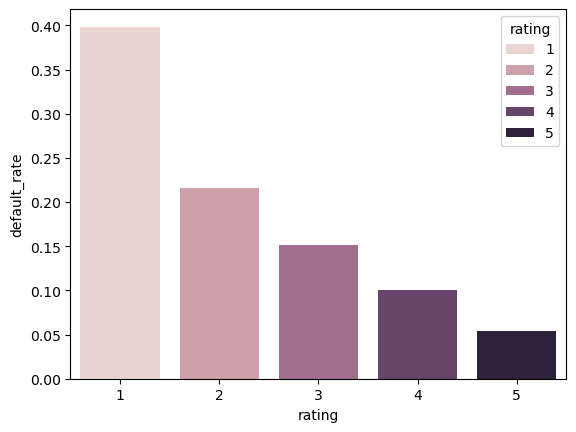

In [28]:
sns.barplot(data=rating_map, x=rating_map['rating'],  y=rating_map['default_rate'], hue="rating")
plt.show()

# model making decision tree

In [39]:
df.head()

,customer_id,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,8153374,0,5221.545193,3915.471226,78039.38546,5,605,0
1,7442532,5,1958.928726,8228.752520,26648.43525,2,572,1
2,2256073,0,3363.009259,2027.830850,65866.71246,4,602,0
3,4885975,0,4766.648001,2501.730397,74356.88347,5,612,0
4,4700614,1,1345.827718,1768.826187,23448.32631,6,631,0


In [40]:
df.drop("customer_id",axis=1, inplace=True)

In [41]:
df.head()

,credit_lines_outstanding,loan_amt_outstanding,total_debt_outstanding,income,years_employed,fico_score,default
0,0,5221.545193,3915.471226,78039.38546,5,605,0
1,5,1958.928726,8228.752520,26648.43525,2,572,1
2,0,3363.009259,2027.830850,65866.71246,4,602,0
3,0,4766.648001,2501.730397,74356.88347,5,612,0
4,1,1345.827718,1768.826187,23448.32631,6,631,0


In [42]:
x = df.drop("default", axis=1)

In [43]:
y = df["default"]

In [46]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train , y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [47]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=4, random_state=42)

model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [48]:
y_pred = model.predict(x_test)
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [54]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [50]:
accuracy_score(y_test, y_pred)

0.9935

In [51]:
report = classification_report(y_test, y_pred)

In [53]:
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1652
           1       0.99      0.98      0.98       348

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



In [55]:
confusion_matrix(y_test, y_pred)

array([[1647,    5],
       [   8,  340]])

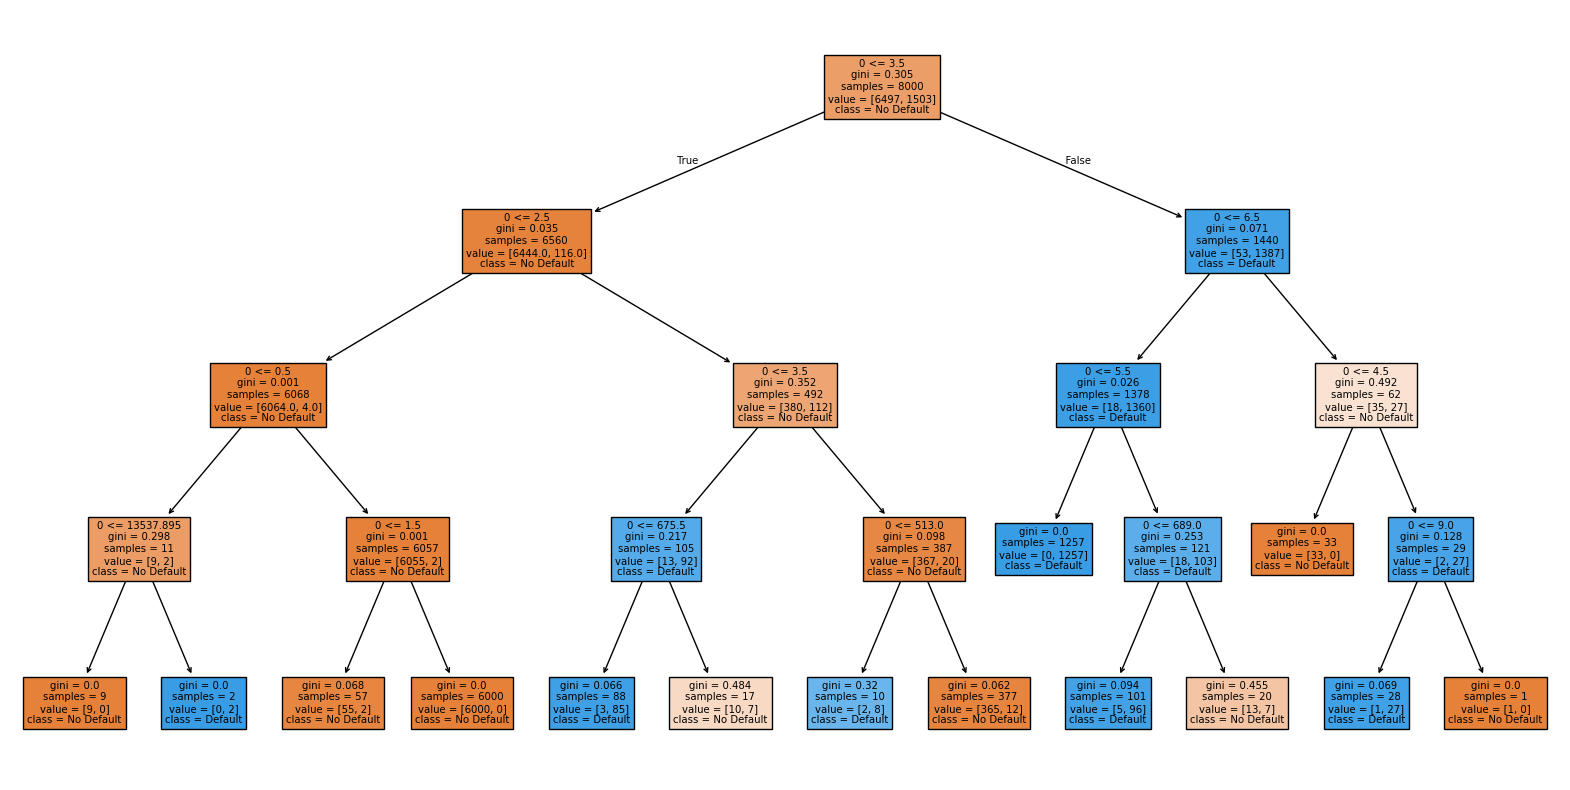

In [60]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plot_tree(model, feature_names=y, class_names=['No Default','Default'], filled=True)
plt.show()
